In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 讀入Tensorflow

In [3]:
class_names = ['T-shirt/top',  # 0
               'Trouser',      # 1
               'Pullover',     # 2
               'Dress',        # 3
               'Coat',         # 4
               'Sandal',       # 5
               'Shirt',        # 6
               'Sneaker',      # 7
               'Bag',          # 8
               'Ankle boot']   # 9

In [4]:
import tensorflow as tf

## 1.讀入MNSIT 數據集

In [5]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

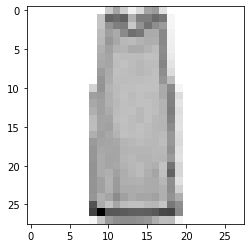

In [7]:
plt.imshow(x_train[9487], cmap='Greys')

In [8]:
print(len(y_train))
print(len(y_test))

60000
10000


## 2.資料整理

In [9]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 3.打造神經網路

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Dense

In [13]:
from tensorflow.keras.optimizers import SGD

In [14]:
model = Sequential()  #開一台函數學習機

In [15]:
model.add(Dense(180,input_dim=784, activation='relu')) #加layer

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.add(Dense(180, activation='relu'))

In [17]:
model.add(Dense(180, activation='relu'))

In [18]:
model.add(Dense(100, activation='relu'))

In [19]:
model.add(Dense(180, activation='relu'))

In [20]:
model.add(Dense(10, activation='softmax'))  #softmax:希望加起來是1

In [21]:
model.compile(loss='mse',optimizer=SGD(lr=0.03),metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [22]:
model.fit(x_train, y_train, batch_size=10, epochs=40)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
60000/60000 [==============================] - 25s 411us/sample - loss: 0.0600 - acc: 0.5228
Epoch 2/40
60000/60000 [==============================] - 25s 415us/sample - loss: 0.0297 - acc: 0.7974
Epoch 3/40
60000/60000 [==============================] - 28s 472us/sample - loss: 0.0250 - acc: 0.8291
Epoch 4/40
60000/60000 [==============================] - 25s 411us/sample - loss: 0.0228 - acc: 0.8437
Epoch 5/40
60000/60000 [==============================] - 25s 417us/sample - loss: 0.0216 - acc: 0.8531
Epoch 6/40
60000/60000 [==============================] - 25s 417us/sample - loss: 0.0206 - acc: 0.8607
Epoch 7/40
60000/60000 [==============================] - 25s 419us/sample - loss: 0.0198 - acc: 0.8649
Epoch 8/40
60000/60000 [==============================] - 25s 419us/sample - loss: 0.0191 - acc: 0.8697
Epoch 9/40
60000/60000 [==============================] - 25s 423us/sample - loss: 0.0185 - acc: 0.8741
Epoch 10/40
6000

In [23]:
score = model.evaluate(x_test, y_test)  #發現準確率略低一點點

10000/10000 [==============================] - 1s 53us/sample - loss: 0.0172 - acc: 0.8829


### 小小成果

In [24]:
result = model.predict_classes(x_test)

In [25]:
class_names[result[9487]]

'Coat'

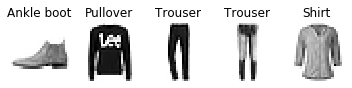

In [34]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys')
    plt.title(class_names[result[i]])
    plt.axis("off")

### NOTE：修改了哪些地方？


In [23]:
# 增加Dense中的units
# 調整層數
# maybe可以改optimizer（嘗試了Adam和AdaGrad,但正確率都很低,應該還可以再嘗試其他的)
# 調低learning rate
# 調低batch_size
# 調高epochs